## DBSCAN Clutering

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [2]:

X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

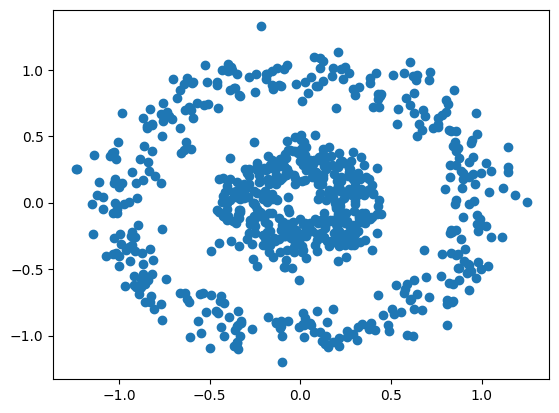

In [3]:
plt.scatter(X[:,0],X[:,1])

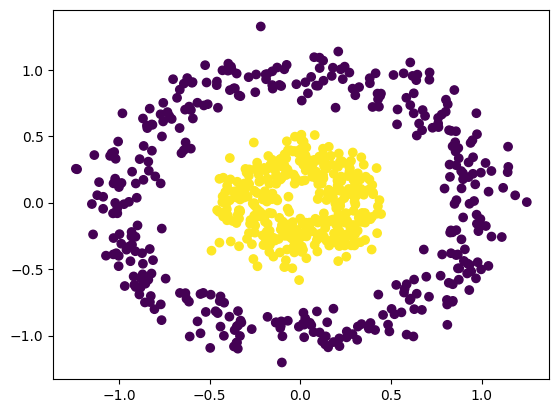

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
dbcan=DBSCAN(eps=0.1)

In [12]:
x_fit = dbcan.fit_predict(X)

In [13]:
dbcan.labels_

array([ 0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  5,  2,  2,  3,  0,  0,
       -1,  0,  0,  2,  4,  0, 11,  0,  0,  4,  5,  0,  5,  3,  0,  0,  0,
       11,  6,  5,  0,  5,  0,  3,  0,  0,  0,  0,  2,  0,  7,  7,  1,  0,
        0,  0,  3,  2,  0,  0,  0,  8,  5,  2,  9,  0, 10,  2, 11,  0,  0,
        1,  1,  0,  0,  0, 11,  0,  0,  2,  2,  0,  6,  2, 11,  0,  0, 10,
        3,  5,  2,  5,  0, -1,  0,  5,  0,  5,  5,  2,  0,  0, 12, -1,  0,
        0,  3,  2,  2,  5,  0, -1,  2,  5,  0,  7,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  8,  7,  1,  0,  5,  1, 12,  0,  6,  0,  8,  0,  0,
        0,  0,  0,  0,  2,  0,  0,  2,  0,  3,  0,  0,  5, -1,  3,  2,  0,
        0,  6,  2,  0, -1, 10,  0,  0,  0,  0,  2,  2, 10,  9,  0,  1,  0,
        0,  6,  0,  7, -1,  0, -1,  8,  3,  0,  0,  5, -1,  1,  0,  0,  3,
       10,  0,  0,  6,  3, 11,  5,  0,  6,  9, 10,  6,  0,  0,  0,  0,  5,
        0,  1,  0,  0,  0,  5,  1,  0,  9,  0,  0,  0,  0,  0,  0, 12,  0,
        0,  1,  0,  1,  0

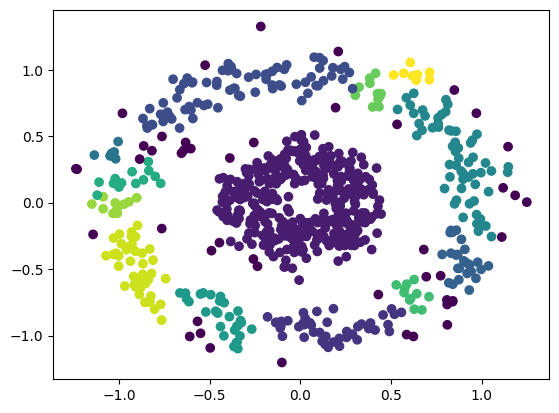

In [14]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)

In [10]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [11]:
lof

LocalOutlierFactor(contamination=0.1)

In [16]:
y_pred = lof.fit_predict(X)

In [19]:
# Get anomaly scores (more negative = more anomalous)
scores = lof.negative_outlier_factor_
print(f"Number of outliers detected: {sum(y_pred == -1)}")


Number of outliers detected: 75


In [21]:
import numpy as np

In [22]:
print(f"Outlier indices: {np.where(y_pred == -1)[0]}")


Outlier indices: [ 17  62  66  71  90  99 114 134 137 141 147 149 161 180 188 199 200 206
 213 226 236 244 262 303 318 324 327 331 335 345 366 377 378 392 393 407
 411 412 417 419 425 450 456 462 473 479 496 497 504 505 507 522 536 557
 578 596 607 617 639 652 655 656 661 663 668 681 689 695 698 700 705 720
 726 735 749]


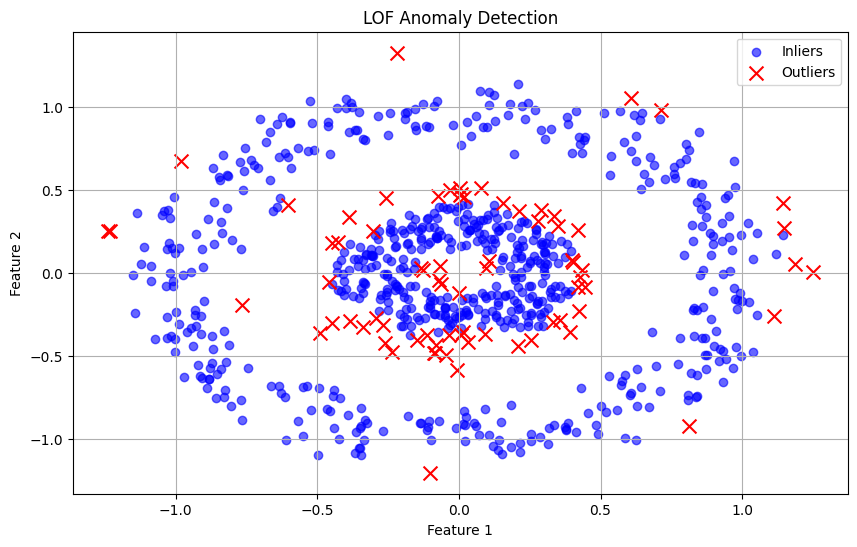

In [24]:
import matplotlib.pyplot as plt

inliers = X[y_pred == 1]
outliers = X[y_pred == -1]

plt.figure(figsize=(10, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', label='Inliers', alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outliers', marker='x', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LOF Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()